In [1]:
#Importing the libraries

import numpy as np

import pandas as pd

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import skew,kurtosis,zscore

<p style='color:blue'><b>Data Understanding</b></p>

In [2]:
#Read customer Product Data file

customer_product_data = pd.read_csv("Data/customer_product_data.csv")

customer_product_data.head(3)

,CustomerID,Product_SKU,Purchase_Frequency,Total_Quantity,Avg_Prod_value,Last_Transaction,Product_Description,Product_Category,Avg_Price,Total_Sales_Generated,...,Customers_purchased,Customer%,Prob_of_Coupon_Usage,recency,Scaled_Recency,Min_Max_recency,scaled_recency,scaled_Purchase_Frequency,scaled_Total_Quantity,user_interest
0,12347,GGOEAAEJ035716,1,1,5.25,2019-11-02,Android Men's Vintage Tank,Apparel,8.705294,213.49,...,17,1.0,0.65,59,8.379121,8.379121,8.379121,1.0,1.0,2.84
1,14049,GGOEAAEJ035716,1,1,5.25,2019-10-29,Android Men's Vintage Tank,Apparel,8.705294,213.49,...,17,1.0,0.65,63,8.269231,8.269231,8.269231,1.0,1.0,2.82
2,14062,GGOEAAEJ035716,1,1,11.75,2019-05-02,Android Men's Vintage Tank,Apparel,8.705294,213.49,...,17,1.0,0.65,243,3.324176,3.324176,3.324176,1.0,1.0,1.58


In [3]:
#Read Product_data file

Product_data = pd.read_csv("Data/product_data.csv")

Product_data.head(3)

,Product_SKU,Product_Description,Product_Category,Avg_Price,Total_Sales_Generated,Avg_Sales_Generated,Customers_purchased,Customer%,Prob_of_Coupon_Usage
0,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,150.971058,672908.76,196.068986,935,70.0,0.85
1,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,79.848815,203877.78,157.922370,614,46.0,0.85
2,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,121.881050,607993.65,188.817904,920,69.0,0.84


In [4]:
#Read data file

data = pd.read_csv("Data/data.csv")

data.head(3)

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Month,Weekday,Product_SKU,Product_Description,...,Quantity,Avg_Price,GST,Delivery_Charges,Coupon_Status,Coupon_Code,Discount_pct,Coupon_Likelihood,Coupon_Used,Avg_Sales
0,17850,M,Chicago,12,16679,2019-01-01,Jan,Tuesday,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,...,1,153.71,0.1,6.5,Used,ELEC10,10.0,1,1,153.71
1,17850,M,Chicago,12,16680,2019-01-01,Jan,Tuesday,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,...,1,153.71,0.1,6.5,Used,ELEC10,10.0,1,1,153.71
2,17850,M,Chicago,12,16699,2019-01-01,Jan,Tuesday,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,...,1,81.50,0.1,6.5,Clicked,ELEC10,10.0,1,0,81.50


In [5]:
data['CustomerID'].nunique()

1338

In [6]:
data.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Month,Weekday,Product_SKU,Product_Description,...,Quantity,Avg_Price,GST,Delivery_Charges,Coupon_Status,Coupon_Code,Discount_pct,Coupon_Likelihood,Coupon_Used,Avg_Sales
0,17850,M,Chicago,12,16679,2019-01-01,Jan,Tuesday,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,...,1,153.71,0.1,6.5,Used,ELEC10,10.0,1,1,153.71
1,17850,M,Chicago,12,16680,2019-01-01,Jan,Tuesday,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,...,1,153.71,0.1,6.5,Used,ELEC10,10.0,1,1,153.71
2,17850,M,Chicago,12,16699,2019-01-01,Jan,Tuesday,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,...,1,81.50,0.1,6.5,Clicked,ELEC10,10.0,1,0,81.50
3,17850,M,Chicago,12,16700,2019-01-01,Jan,Tuesday,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,...,1,153.71,0.1,6.5,Clicked,ELEC10,10.0,1,0,153.71
4,17850,M,Chicago,12,16701,2019-01-01,Jan,Tuesday,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,...,1,153.71,0.1,6.5,Clicked,ELEC10,10.0,1,0,153.71


In [7]:
#Read data file

model_data = pd.read_csv("Data/model_data.csv")

model_data.head(3)

,CustomerID,Product_SKU,user_interest
0,12347,GGOEAAEJ035716,2.84
1,14049,GGOEAAEJ035716,2.82
2,14062,GGOEAAEJ035716,1.58


In [8]:
model_data['CustomerID'].nunique()

1338

In [9]:
customer_product_data['CustomerID'] = customer_product_data['CustomerID'].astype(str)

model_data['CustomerID'] = model_data['CustomerID'].astype(str)

data['CustomerID'] = data['CustomerID'].astype(str)

In [10]:
model_data

,CustomerID,Product_SKU,user_interest
0,12347,GGOEAAEJ035716,2.84
1,14049,GGOEAAEJ035716,2.82
2,14062,GGOEAAEJ035716,1.58
3,14185,GGOEAAEJ035716,2.38
4,14243,GGOEAAEJ035716,2.83
...,...,...,...
31296,17917,GGOEGAHB057413,1.62
31297,18077,GGOEGAYT068556,1.33
31298,18118,GGOEGADB059213,1.07
31299,18156,GGOEGAQJ058715,1.07


In [11]:
sparse_data = model_data.copy()

#sparse_data.rename(columns={'Min_Max_recency':'recency'},inplace=True)

#sparse_data['recency'] = round(sparse_data['recency'],2)

sparse_data.head()

,CustomerID,Product_SKU,user_interest
0,12347,GGOEAAEJ035716,2.84
1,14049,GGOEAAEJ035716,2.82
2,14062,GGOEAAEJ035716,1.58
3,14185,GGOEAAEJ035716,2.38
4,14243,GGOEAAEJ035716,2.83


### <b>Creating Sparse Matrix</b>

In [12]:
from scipy.sparse import csr_matrix

def build_sparse_matrix(df):
    
    C = df['CustomerID'].nunique()
    P = df['Product_SKU'].nunique()
    
    cust_mapper = dict(zip(np.unique(df['CustomerID']), list(range(C))))
    prod_mapper = dict(zip(np.unique(df['Product_SKU']), list(range(P))))
    
    cust_inv_mapper = dict(zip( list(range(C)), np.unique(df['CustomerID'])))
    prod_inv_mapper = dict(zip(list(range(P)), np.unique(df['Product_SKU'])))
    
    cust_index = [cust_mapper[i] for i in df['CustomerID']]
    prod_index = [prod_mapper[i] for i in df['Product_SKU']]
    
    X = csr_matrix((df['user_interest'],(cust_index, prod_index)), shape=(C,P))
    
    return X, cust_mapper, prod_mapper, cust_inv_mapper, prod_inv_mapper

X, cust_mapper, prod_mapper, cust_inv_mapper, prod_inv_mapper = build_sparse_matrix(sparse_data)#(customer_product_data)



In [13]:
X.shape

(1338, 1110)

In [14]:
n_total = X.shape[0]*X.shape[1]
n_recency = X.nnz
print("Number of non zero elements available: ",n_recency)
sparsity = (1-n_recency/n_total)
print(f"Matrix sparsity: {round(sparsity*100,2)}%")

Number of non zero elements available:  31301
Matrix sparsity: 97.89%


In [15]:
print(n_total," , ", n_recency)

1485180  ,  31301


In [16]:
n_interests_per_user = X.getnnz(axis=1)
len(n_interests_per_user)

1338

In [17]:
temp_df = data.groupby(['CustomerID']).agg(UniqueProducts=('Product_SKU','nunique')).reset_index().sort_values(by='UniqueProducts',
                                                                                                     ascending=True)

temp_df[temp_df['UniqueProducts']>10]

,CustomerID,UniqueProducts
527,14673,11
936,16560,11
1140,17412,11
1112,17329,11
639,15192,11
...,...,...
586,14911,193
672,15311,205
1236,17841,230
511,14606,247


In [18]:
print(f"Most active customers interested in {n_interests_per_user.max()} products.")
print(f"Least active customers interested in {n_interests_per_user.min()} products.")

Most active customers interested in 254 products.
Least active customers interested in 1 products.


In [19]:
n_interests_per_product = X.getnnz(axis=0)
len(n_interests_per_product)

1110

In [20]:
data.groupby(['Product_SKU']).agg(UniqueUsers=('CustomerID','nunique')).reset_index().sort_values(by='UniqueUsers',
                                                                                                     ascending=False).head(5)

,Product_SKU,UniqueUsers
948,GGOENEBJ079499,935
943,GGOENEBB078899,930
950,GGOENEBQ078999,920
951,GGOENEBQ079099,614
952,GGOENEBQ079199,548


In [21]:
print(f"Most interested product has {n_interests_per_product.max()} user impressions.")
print(f"Least interested product has {n_interests_per_product.min()} user impressions.")

Most interested product has 935 user impressions.
Least interested product has 1 user impressions.


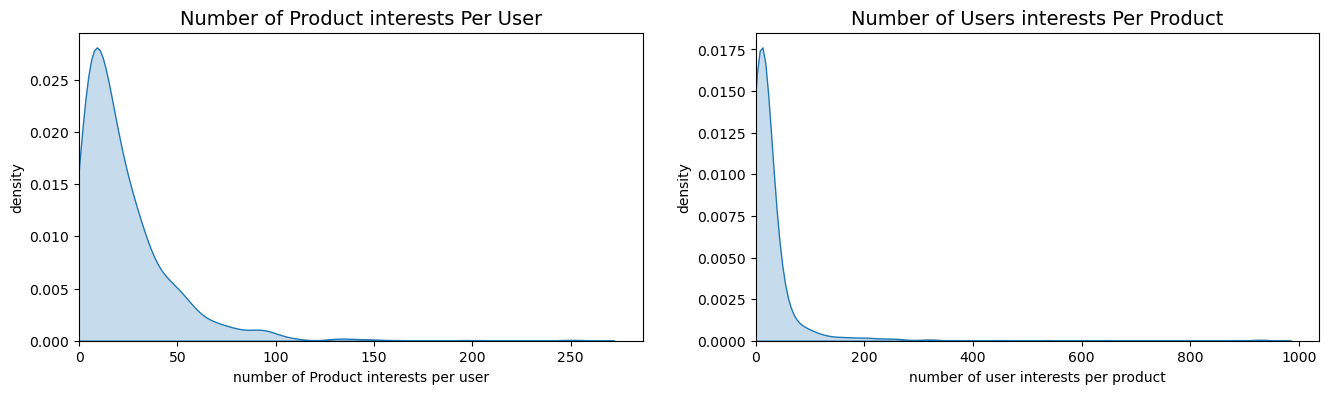

In [22]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.kdeplot(n_interests_per_user, shade=True)
plt.xlim(0)
plt.title("Number of Product interests Per User", fontsize=14)
plt.xlabel("number of Product interests per user")
plt.ylabel("density")
plt.subplot(1,2,2)
sns.kdeplot(n_interests_per_product, shade=True)
plt.xlim(0)
plt.title("Number of Users interests Per Product", fontsize=14)
plt.xlabel("number of user interests per product")
plt.ylabel("density")
plt.show()

### <b>Product Recommendations with KNN </b>

<b>User-based Collaborative filtering</b>

In [133]:
X.getrow(527).data

array([1.29, 1.3 , 1.3 , 1.3 , 1.3 , 1.3 , 1.3 , 1.29, 1.48, 1.39, 1.39])

In [143]:
from sklearn.neighbors import NearestNeighbors

def get_user_based_recommendations(cust_id, X, cust_mapper, prod_mapper, prod_inv_mapper, k, metric = 'cosine', n=5):
    
    model = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='cosine')
    
    # Fit the model to the customer-product matrix
    model.fit(X)
    
    #get customer index
    cust_ind = cust_mapper[cust_id]
    
    print(cust_ind)
    
    # Find the indices and distances of the k nearest neighbors to the user
    distances, indices = model.kneighbors(X[cust_ind],n_neighbors=k+1)
    distances = distances.squeeze()
    indices = indices.squeeze()
    
    distances = distances[1:]
    indices = indices[1:]
    
    traget_customer_prods = X[cust_ind].indices
    
    neighbor_prods = [X[i].indices for i in indices]
    
    neighbor_prods = np.concatenate(neighbor_prods)
    
    recommedations_list = np.setdiff1d(neighbor_prods, traget_customer_prods)
    
    prod_counts = np.bincount(recommedations_list)
    
    top_recomm = np.argsort(prod_counts)[::-1][:n]

    
    recom_prod_id = [prod_inv_mapper[i] for i in top_recomm]
    
    
    
    return recom_prod_id
    

In [144]:
cust_id = '14673'#'13136'#'14606' #'14911' #'GGOENEBQ079199'

product_recommendations = get_user_based_recommendations( cust_id, X, cust_mapper, prod_mapper, prod_inv_mapper, k=15,n=5)   


product_desc = pd.Series([Product_data[Product_data['Product_SKU']==i]['Product_Description'] 
                           for i in product_recommendations ])

print(product_recommendations)

print("\n\nBased on your interestes ", " you might like below:\n", )
for desc in product_desc:
    print("\n",desc.values)
    
    
#Product_data[Product_data['Product_SKU'].isin(product_recommendations)]
    

527
['GGOEYDHJ019399', 'GGOEGADB056614', 'GGOENEBQ079099', 'GGOENEBB081499', 'GGOEGOFH020299']


Based on your interestes   you might like below:


 ['24 oz YouTube Sergeant Stripe Bottle']

 ["Men's Weatherblock Shell Jacket Black"]

 ['Nest Protect Smoke + CO White Battery Alarm-USA']

 ['Nest Cam Indoor Security Camera - CA']

 ['Galaxy Screen Cleaning Cloth']


In [145]:
prod_list = list(customer_product_data[(customer_product_data['CustomerID']=='14673')]['Product_Description'].unique())

print("Customer 14673 purchase history contains below products - \n",)
for prod in prod_list:
    print(prod,"\n")# & (customer_product_data['Product_SKU'].isin(product_recommendations))]

Customer 14673 purchase history contains below products - 

Windup Android 

Nest Cam Indoor Security Camera - USA 

Nest Learning Thermostat 3rd Gen-USA - Stainless Steel 

Nest Cam Outdoor Security Camera - USA 

26 oz Double Wall Insulated Bottle 

Google Men's 100% Cotton Short Sleeve Hero Tee Black 

Google Men's 100% Cotton Short Sleeve Hero Tee White 

Android BTTF Moonshot Graphic Tee 

Android Men's Short Sleeve Tri-blend Hero Tee Grey 

Google Men's Around The Block Short Sleeve Tee Ash 

Android Men's Short Sleeve Hero Tee White 



In [146]:
cust_id = '17412'#'14673'#'13136'#'14606' #'14911' #'GGOENEBQ079199'

product_recommendations = get_user_based_recommendations( cust_id, X, cust_mapper, prod_mapper, prod_inv_mapper, k=15,n=10)   


product_desc = pd.Series([Product_data[Product_data['Product_SKU']==i]['Product_Description'] 
                           for i in product_recommendations ])

print(product_recommendations)

print("\n\nBased on your interestes ", " you might like below:\n", )
for desc in product_desc:
    print("\n",desc.values)
    
    
#Product_data[Product_data['Product_SKU'].isin(product_recommendations)]
    

1140
['GGOEWFKA083299', 'GGOEGAAJ080615', 'GGOEGOCB017499', 'GGOEGADB056614', 'GGOEGOCC077299', 'GGOEGAAB033814', 'GGOEGAAB033815', 'GGOEADWQ015699', 'GGOEGAAJ032313', 'GGOENEBQ086799']


Based on your interestes   you might like below:


 ['Waze Mood Ninja Window Decal']

 ["Google Men's Bike Short Sleeve Tee Charcoal"]

 ['Leatherette Journal']

 ["Men's Weatherblock Shell Jacket Black"]

 ['Google RFID Journal']

 ["Google Men's Vintage Badge Tee Black"]

 ["Google Men's Vintage Badge Tee Black"]

 ['Android Rise 14 oz Mug']

 ["Google Men's Short Sleeve Hero Tee Charcoal"]

 ['Nest Thermostat E - USA']


customer_product_data[(customer_product_data['CustomerID']=='14673')]

In [147]:
prod_list = list(customer_product_data[(customer_product_data['CustomerID']=='17412')]['Product_Description'].unique())

print("Customer 17412 purchase history contains below products - \n",)
for prod in prod_list:
    print(prod,"\n")# & (customer_product_data['Product_SKU'].isin(product_recommendations))]

Customer 17412 purchase history contains below products - 

Google Doodle Decal 

Nest Cam Indoor Security Camera - USA 

Nest Learning Thermostat 3rd Gen-USA - Copper 

Nest Learning Thermostat 3rd Gen-USA - Stainless Steel 

Nest Cam Outdoor Security Camera - USA 

Nest Protect Smoke + CO White Battery Alarm-USA 

24 oz YouTube Sergeant Stripe Bottle 

Google Hard Cover Journal 

Google Slim Utility Travel Bag 

YouTube Hard Cover Journal 

YouTube Youth Short Sleeve Tee Red 



!pip install scikit-surprise

<b>Item-Item based Collaborative filtering</b>

In [52]:
from sklearn.neighbors import NearestNeighbors

def get_product_recommendations(prod_id, X, prod_mapper, prod_inv_mapper, k, metric = 'cosine'):
    
    X = X.T
    
    # print(X[:5])
    
    neighbour_ids = []
    
    prod_ind = prod_mapper[prod_id]
    
    # print(prod_ind) #
    
    prod_vec = X[prod_ind]
    
    # print(prod_vec) #
    
    if isinstance(prod_vec, (np.ndarray)):
        prod_vec = prod_vec.reshape(1,-1)
        
    # use k+1 since kNN output includes the product Id of interest
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    
    kNN.fit(X)
    
    
    neighbour = kNN.kneighbors(prod_vec, return_distance=False)
    
    for i in range(0,k+1):
        
        n = neighbour.item(i)
        
        neighbour_ids.append(prod_inv_mapper[n])
        #print(prod_inv_mapper[n])
        
    neighbour_ids.pop(0)
    return neighbour_ids

In [53]:
prod_id = 'GGOENEBB078899'#'GGOEGALQ058116' #'GGOENEBQ079199'

product_recommendations = get_product_recommendations( prod_id, X, prod_mapper, prod_inv_mapper, k=5)

print(product_recommendations)

search_product = Product_data[Product_data['Product_SKU']==prod_id]['Product_Description'].values

product_desc = pd.Series([Product_data[Product_data['Product_SKU']==i]['Product_Description'] 
                           for i in product_recommendations ])



print("\n\nSince you are checking the product: ",search_product, " you might like below:\n", )
for desc in product_desc:
    print("\n",desc.values)


['GGOENEBQ078999', 'GGOENEBJ079499', 'GGOENEBQ084699', 'GGOENEBQ079099', 'GGOENEBQ079199']


Since you are checking the product:  ['Nest Cam Indoor Security Camera - USA']  you might like below:


 ['Nest Cam Outdoor Security Camera - USA']

 ['Nest Learning Thermostat 3rd Gen-USA - Stainless Steel']

 ['Nest Learning Thermostat 3rd Gen-USA - White']

 ['Nest Protect Smoke + CO White Battery Alarm-USA']

 ['Nest Protect Smoke + CO White Wired Alarm-USA']


### <b>Applying the Matrix_Factorization to deal with Sparsity</b>

In [202]:
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Split the data into training and test sets
X_train, X_test = train_test_split(X.T, test_size=0.2, random_state=42)

# Create a pipeline with TruncatedSVD and a Normalizer
svd = TruncatedSVD(n_components=300, random_state=42)
#normalizer = Normalizer(copy=False)
#lsa = make_pipeline(svd, normalizer)

# Fit and transform the training data
X_train_lsa = svd.fit_transform(X_train)

# Transform the test data
X_test_lsa = svd.transform(X_test)

# Calculate the reconstruction error
reconstruction_error = np.sqrt(np.mean(np.square(X_test - svd.inverse_transform(X_test_lsa))))

print("Reconstruction Error:", reconstruction_error)


Reconstruction Error: 0.19245084486712447


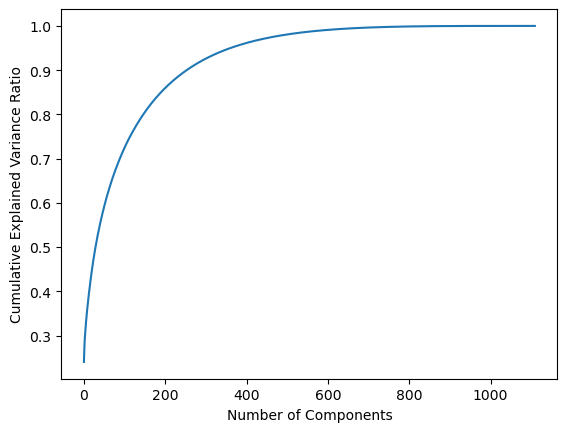

In [228]:
import matplotlib.pyplot as plt

svd = TruncatedSVD(n_components=1200, n_iter=1000)
Q = svd.fit(X.T)


plt.plot(np.cumsum(Q.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

In [234]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=230, n_iter=1000, random_state=42)
Q = svd.fit_transform(X.T)
Q.shape

(1110, 230)

In [235]:
prod_id = 'GGOENEBB078899' #'GGOEGALQ058116'

similar_products = get_product_recommendations(prod_id, Q.T, prod_mapper, prod_inv_mapper, metric='cosine', k=5)

search_product = Product_data[Product_data['Product_SKU']==prod_id]['Product_Description'].values

product_desc = pd.Series([Product_data[Product_data['Product_SKU']==i]['Product_Description'] 
                           for i in similar_products ])



print("\n\nSince you are checking the product: ",search_product, " you might like below:\n", )
for desc in product_desc:
    print("\n",desc.values)




Since you are checking the product:  ['Nest Cam Indoor Security Camera - USA']  you might like below:


 ['Nest Cam Outdoor Security Camera - USA']

 ['Nest Learning Thermostat 3rd Gen-USA - Stainless Steel']

 ['Nest Learning Thermostat 3rd Gen-USA - White']

 ['Nest Protect Smoke + CO White Battery Alarm-USA']

 ['Nest Protect Smoke + CO White Wired Alarm-USA']


In [236]:
prod_id = 'GGOEADHH055999'

similar_products = get_product_recommendations(prod_id, Q.T, prod_mapper, prod_inv_mapper, metric='cosine', k=5)

search_product = Product_data[Product_data['Product_SKU']==prod_id]['Product_Description'].values

product_desc = pd.Series([Product_data[Product_data['Product_SKU']==i]['Product_Description'] 
                           for i in similar_products ])



print("\n\nSince you are checking the product: ",search_product, " you might like below:\n", )
for desc in product_desc:
    print("\n",desc.values)




Since you are checking the product:  ['22 oz Android Bottle']  you might like below:


 ['Collapsible Shopping Bag']

 ["Google Women's 1/4 Zip Performance Pullover Two-Tone Blue"]

 ['Android Youth Short Sleeve T-shirt Aqua']

 ['Google 22 oz Water Bottle']

 ['Foam Can and Bottle Cooler']


In [237]:
prod_id = 'GGOEGOCL077699'

similar_products = get_product_recommendations(prod_id, Q.T, prod_mapper, prod_inv_mapper, metric='cosine', k=5)

search_product = Product_data[Product_data['Product_SKU']==prod_id]['Product_Description'].values

product_desc = pd.Series([Product_data[Product_data['Product_SKU']==i]['Product_Description'] 
                           for i in similar_products ])



print("\n\nSince you are checking the product: ",search_product, " you might like below:\n", )
for desc in product_desc:
    print("\n",desc.values)




Since you are checking the product:  ['Google Hard Cover Journal']  you might like below:


 ['YouTube Hard Cover Journal']

 ['Foam Can and Bottle Cooler']

 ["Google Men's  Zip Hoodie"]

 ['Nest Cam Indoor Security Camera - USA']

 ["Google Men's Vintage Badge Tee Black"]


### <b>Content-based filtering</b>

In [32]:
Product_data.reset_index()

Product_data.head(3)

,Product_SKU,Product_Description,Product_Category,Avg_Price,Total_Sales_Generated,Avg_Sales_Generated,Customers_purchased,Customer%,Prob_of_Coupon_Usage
0,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,150.971058,672908.76,196.068986,935,70.0,0.85
1,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,79.848815,203877.78,157.922370,614,46.0,0.85
2,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,121.881050,607993.65,188.817904,920,69.0,0.84


In [33]:
product_categories = Product_data['Product_Category'].unique()
print("We have ", len(product_categories)," categories which are :\n",product_categories)

print("we have ", Product_data['Product_SKU'].nunique()," Products")

We have  20  categories which are :
 ['Nest-USA' 'Office' 'Apparel' 'Bags' 'Drinkware' 'Lifestyle' 'Waze'
 'Headgear' 'Fun' 'Google' 'Notebooks & Journals' 'Backpacks'
 'Nest-Canada' 'Housewares' 'Bottles' 'Nest' 'Android' 'Accessories'
 'Gift Cards' 'More Bags']
we have  1110  Products


In [34]:
dummy_data = pd.get_dummies(Product_data['Product_Category'])

dummy_data = dummy_data.astype(int)

prod_df = pd.concat([Product_data, dummy_data], axis =1)

prod_cat_df = prod_df.drop(columns=['Product_SKU','Product_Description','Product_Category'])

prod_df.head(2)

,Product_SKU,Product_Description,Product_Category,Avg_Price,Total_Sales_Generated,Avg_Sales_Generated,Customers_purchased,Customer%,Prob_of_Coupon_Usage,Accessories,...,Headgear,Housewares,Lifestyle,More Bags,Nest,Nest-Canada,Nest-USA,Notebooks & Journals,Office,Waze
0,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,150.971058,672908.76,196.068986,935,70.0,0.85,0,...,0,0,0,0,0,0,1,0,0,0
1,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,79.848815,203877.78,157.922370,614,46.0,0.85,0,...,0,0,0,0,0,0,1,0,0,0


In [35]:
prod_cat_df.head(2)

,Avg_Price,Total_Sales_Generated,Avg_Sales_Generated,Customers_purchased,Customer%,Prob_of_Coupon_Usage,Accessories,Android,Apparel,Backpacks,...,Headgear,Housewares,Lifestyle,More Bags,Nest,Nest-Canada,Nest-USA,Notebooks & Journals,Office,Waze
0,150.971058,672908.76,196.068986,935,70.0,0.85,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,79.848815,203877.78,157.922370,614,46.0,0.85,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [48]:
from sklearn.preprocessing import RobustScaler,MinMaxScaler

scaler =  MinMaxScaler()

prod_cat_df['scaled_sales'] = scaler.fit_transform(prod_cat_df['Avg_Sales_Generated'].values.reshape(-1,1))

prod_cat_df['scaled_Customers_purchased'] = scaler.fit_transform(prod_cat_df['Customers_purchased'].values.reshape(-1,1))

In [49]:
prod_cat_df.drop(columns=['Avg_Price','Avg_Sales_Generated','Customers_purchased','Customer%','Total_Sales_Generated'],inplace=True) #,'Prob_of_Coupon_Usage'

In [50]:
product_idx = dict(zip(Product_data['Product_SKU'], list(Product_data.index)))

sample_product_idx = ', '.join(f"{key}: {value}" for key, value in list(product_idx.items())[:3])

print(sample_product_idx)

GGOENEBJ079499: 0, GGOENEBQ079099: 1, GGOENEBQ078999: 2


In [51]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(prod_cat_df, prod_cat_df)

print(f"Dimensions of our genres cosine similarity matrix: {cosine_sim.shape}")

Dimensions of our genres cosine similarity matrix: (1110, 1110)


In [52]:
cosine_sim

array([[1.        , 0.98252536, 0.9999734 , ..., 0.3230156 , 0.36739159,
        0.31368857],
       [0.98252536, 1.        , 0.98351138, ..., 0.36268824, 0.40902964,
        0.35112936],
       [0.9999734 , 0.98351138, 1.        , ..., 0.32212867, 0.3663249 ,
        0.31276698],
       ...,
       [0.3230156 , 0.36268824, 0.32212867, ..., 1.        , 0.43257652,
        0.37461748],
       [0.36739159, 0.40902964, 0.3663249 , ..., 0.43257652, 1.        ,
        0.99230389],
       [0.31368857, 0.35112936, 0.31276698, ..., 0.37461748, 0.99230389,
        1.        ]])

In [53]:
def get_prod_desc(df,index):
    
    prod_desc =df.at[index, 'Product_Description']
    
    return prod_desc

def get_prod_price(df,index):
    
    prod_sales = round(df.at[index, 'Avg_Price'],2)
    
    return prod_sales

def get_prod_Sales(df,index):
    
    prod_sales = round(df.at[index, 'Avg_Sales_Generated'],2)
    
    return prod_sales

def get_prod_coupon_usage(df,index):
    
    prod_coupon_usage = round(df.at[index, 'Prob_of_Coupon_Usage'],2)
    
    return prod_coupon_usage

def get_prod_customers(df,index):
    
    prod_coupon_usage = round(df.at[index, 'Customer%'],2)
    
    return prod_coupon_usage

def get_prod_id(df,index):
    
    prod_id = df.at[index, 'Product_SKU']
    
    return prod_id


def get_content_based_product_recommendations(prod_id, n_recommendations=5):
    
    index = product_idx[prod_id]
    
    prod_desc = get_prod_desc(Product_data, index) #Product_data.at[index, 'Product_Description']
    
    prod_sales = get_prod_price(Product_data,index)
    
    prod_coup = get_prod_coupon_usage(Product_data,index)
    
    sim_scores = list(enumerate(cosine_sim[index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:(n_recommendations+1)]
    
    similar_products = [i[0] for i in sim_scores]
    
    print(f"Because you are looking at {prod_desc},\nDetails - ${prod_sales} , coupon usage prob% {prod_coup}:\n\n")
    print("you might like:\n")
    
    counter = 1
    for id in similar_products:
        
        print("\n",counter,". ",get_prod_desc(Product_data,id)," \n\n",get_prod_id(Product_data, id)," Details- $",get_prod_price(Product_data,id), "coupon usage% - ",
              get_prod_coupon_usage(Product_data,id),"\nAvg Revenue boost- $",get_prod_Sales(Product_data,id),
              " %Customer purchased-",get_prod_customers(Product_data,id))
        counter+=1
    #print(Product_data['Product_Description'].iloc[similar_products])

<b>Analysing the top categories</b>

Office

In [54]:
prod_id = 'GGOEGOXQ016399'

get_content_based_product_recommendations(prod_id,5)

Because you are looking at Badge Holder,
Details - $1.88 , coupon usage prob% 0.87:


you might like:


 1 .  Android Sticker Sheet Ultra Removable  

 GGOEAFKQ020599  Details- $ 2.69 coupon usage% -  0.86 
Avg Revenue boost- $ 8.75  %Customer purchased- 10.0

 2 .  Keyboard DOT Sticker  

 GGOEGFKA022299  Details- $ 1.36 coupon usage% -  0.86 
Avg Revenue boost- $ 19.79  %Customer purchased- 10.0

 3 .  Ballpoint LED Light Pen  

 GGOEGOAQ012899  Details- $ 2.26 coupon usage% -  0.84 
Avg Revenue boost- $ 38.3  %Customer purchased- 13.0

 4 .  8 pc Android Sticker Sheet  

 GGOEAFKQ020499  Details- $ 1.82 coupon usage% -  0.82 
Avg Revenue boost- $ 13.09  %Customer purchased- 12.0

 5 .  Google Stylus Pen w/ LED Light  

 GGOEGOAR013099  Details- $ 5.16 coupon usage% -  0.84 
Avg Revenue boost- $ 52.38  %Customer purchased- 9.0


In [55]:
prod_id = 'GGOEGHPB071610'

#fetch product recommendations for 'GGOEGHPB071610' product id
get_content_based_product_recommendations(prod_id,5)

Because you are looking at Google Twill Cap,
Details - $9.87 , coupon usage prob% 0.85:


you might like:


 1 .  YouTube Twill Cap  

 GGOEYHPB072210  Details- $ 10.41 coupon usage% -  0.88 
Avg Revenue boost- $ 54.75  %Customer purchased- 10.0

 2 .  Google Men's Vintage Badge Tee Sage  

 GGOEGAAH034015  Details- $ 6.12 coupon usage% -  0.85 
Avg Revenue boost- $ 10.4  %Customer purchased- 10.0

 3 .  Google Men's Vintage Badge Tee Black  

 GGOEGAAB033814  Details- $ 9.93 coupon usage% -  0.8 
Avg Revenue boost- $ 13.43  %Customer purchased- 9.0

 4 .  Google Men's 100% Cotton Short Sleeve Hero Tee White  

 GGOEGAAQ010415  Details- $ 14.99 coupon usage% -  0.83 
Avg Revenue boost- $ 31.54  %Customer purchased- 9.0

 5 .  Google Men's 100% Cotton Short Sleeve Hero Tee Black  

 GGOEGAAB010514  Details- $ 15.04 coupon usage% -  0.86 
Avg Revenue boost- $ 49.21  %Customer purchased- 8.0


In [56]:
prod_id = 'GGOENEBJ079499' #Nest-USA Category

#fetch top 5 recommendations similar to product id - 'GGOENEBQ078999'
get_content_based_product_recommendations(prod_id,5)

Because you are looking at Nest Learning Thermostat 3rd Gen-USA - Stainless Steel,
Details - $150.97 , coupon usage prob% 0.85:


you might like:


 1 .  Nest Cam Outdoor Security Camera - USA  

 GGOENEBQ078999  Details- $ 121.88 coupon usage% -  0.84 
Avg Revenue boost- $ 188.82  %Customer purchased- 69.0

 2 .  Nest Cam Indoor Security Camera - USA  

 GGOENEBB078899  Details- $ 120.23 coupon usage% -  0.84 
Avg Revenue boost- $ 163.58  %Customer purchased- 70.0

 3 .  Nest Protect Smoke + CO White Battery Alarm-USA  

 GGOENEBQ079099  Details- $ 79.85 coupon usage% -  0.85 
Avg Revenue boost- $ 157.92  %Customer purchased- 46.0

 4 .  Nest Protect Smoke + CO White Wired Alarm-USA  

 GGOENEBQ079199  Details- $ 79.76 coupon usage% -  0.86 
Avg Revenue boost- $ 200.15  %Customer purchased- 41.0

 5 .  Nest Learning Thermostat 3rd Gen-USA - White  

 GGOENEBQ084699  Details- $ 149.65 coupon usage% -  0.85 
Avg Revenue boost- $ 187.51  %Customer purchased- 39.0


In [57]:
prod_id = 'GGOEYOCB092699' #'GGOEGOCL077699'


get_content_based_product_recommendations(prod_id,5)

Because you are looking at YouTube Transmission Journal Black,
Details - $18.68 , coupon usage prob% 1.0:


you might like:


 1 .  YouTube RFID Journal  

 GGOEYOCR077399  Details- $ 9.17 coupon usage% -  1.0 
Avg Revenue boost- $ 75.18  %Customer purchased- 1.0

 2 .  Google Leather Journal-Brown  

 GGOEGOCD078199  Details- $ 22.1 coupon usage% -  0.91 
Avg Revenue boost- $ 117.32  %Customer purchased- 2.0

 3 .  Google Spiral Leather Journal  

 GGOEGOCR078499  Details- $ 12.01 coupon usage% -  0.89 
Avg Revenue boost- $ 141.42  %Customer purchased- 3.0

 4 .  Android RFID Journal  

 GGOEAOCB077499  Details- $ 6.57 coupon usage% -  0.86 
Avg Revenue boost- $ 35.54  %Customer purchased- 2.0

 5 .  Google Spiral Journal with Pen  

 GGOEGOCC077999  Details- $ 7.53 coupon usage% -  0.88 
Avg Revenue boost- $ 162.64  %Customer purchased- 5.0


In [58]:
prod_id = 'GGOEGBMJ013399'


get_content_based_product_recommendations(prod_id,5)

Because you are looking at Sport Bag,
Details - $4.41 , coupon usage prob% 0.85:


you might like:


 1 .  Google Canvas Tote Natural/Navy  

 GGOEGBJL013999  Details- $ 13.64 coupon usage% -  0.88 
Avg Revenue boost- $ 54.6  %Customer purchased- 11.0

 2 .  Collapsible Shopping Bag  

 GGOEGBJC019999  Details- $ 4.4 coupon usage% -  0.83 
Avg Revenue boost- $ 73.13  %Customer purchased- 10.0

 3 .  Google Rucksack  

 GGOEGBRJ037399  Details- $ 61.72 coupon usage% -  0.85 
Avg Revenue boost- $ 147.49  %Customer purchased- 10.0

 4 .  Google Alpine Style Backpack  

 GGOEGBRJ037299  Details- $ 87.74 coupon usage% -  0.8 
Avg Revenue boost- $ 119.66  %Customer purchased- 9.0

 5 .  Waterproof Backpack  

 GGOEGBRA037499  Details- $ 87.21 coupon usage% -  0.87 
Avg Revenue boost- $ 117.69  %Customer purchased- 7.0


In [60]:
prod_id = 'GGOEADHH055999'

get_content_based_product_recommendations(prod_id,5)

Because you are looking at 22 oz Android Bottle,
Details - $2.79 , coupon usage prob% 0.84:


you might like:


 1 .  22 oz YouTube Bottle Infuser  

 GGOEYDHJ056099  Details- $ 4.19 coupon usage% -  0.8 
Avg Revenue boost- $ 33.11  %Customer purchased- 8.0

 2 .  Google Women's Short Sleeve Hero Tee Sky Blue  

 GGOEGAEC029113  Details- $ 15.71 coupon usage% -  1.0 
Avg Revenue boost- $ 17.03  %Customer purchased- 2.0

 3 .  Android Stretch Fit Hat M/L  

 GGOEAHPJ004314  Details- $ 13.49 coupon usage% -  1.0 
Avg Revenue boost- $ 34.65  %Customer purchased- 2.0

 4 .  YouTube RFID Journal  

 GGOEYOCR077399  Details- $ 9.17 coupon usage% -  1.0 
Avg Revenue boost- $ 75.18  %Customer purchased- 1.0

 5 .  Google Men's 100% Cotton Short Sleeve Hero Tee Navy  

 GGOEGAAL010613  Details- $ 15.63 coupon usage% -  1.0 
Avg Revenue boost- $ 16.53  %Customer purchased- 1.0


In [312]:
prod_id = 'GGOEGHPJ080310'


get_content_based_product_recommendations(prod_id,5)

Because you are looking at Google Blackout Cap,
Details - $12.93 , coupon usage prob% 0.84:


you might like:


 Google 5-Panel Snapback Cap  
 Details- $ 14.12 coupon usage% -  0.84 
Avg Revenue boost- $ 21.63  %Customer purchased- 3.0

 Google Trucker Hat  
 Details- $ 20.27 coupon usage% -  0.83 
Avg Revenue boost- $ 30.89  %Customer purchased- 3.0

 Google 5-Panel Cap  
 Details- $ 17.3 coupon usage% -  0.93 
Avg Revenue boost- $ 21.13  %Customer purchased- 3.0

 Google Snapback Hat Black  
 Details- $ 16.48 coupon usage% -  0.89 
Avg Revenue boost- $ 25.23  %Customer purchased- 2.0

 Google Snapback Black Cap  
 Details- $ 17.91 coupon usage% -  0.86 
Avg Revenue boost- $ 21.73  %Customer purchased- 2.0


In [313]:
prod_id = 'GGOEAAWQ063048'


get_content_based_product_recommendations(prod_id,5)

Because you are looking at Android Baby Esssentials Set,
Details - $23.79 , coupon usage prob% 1.0:


you might like:


 Google Men's Heavyweight Long Sleeve Hero Tee Navy  
 Details- $ 39.99 coupon usage% -  1.0 
Avg Revenue boost- $ 2199.45  %Customer purchased- 0.0

 Google Men's Heavyweight Long Sleeve Hero Tee Navy  
 Details- $ 39.99 coupon usage% -  1.0 
Avg Revenue boost- $ 1479.63  %Customer purchased- 0.0

 Android Baby Esssentials Set  
 Details- $ 23.79 coupon usage% -  1.0 
Avg Revenue boost- $ 1189.5  %Customer purchased- 0.0

 Google Men's Heavyweight Long Sleeve Hero Tee Navy  
 Details- $ 39.99 coupon usage% -  1.0 
Avg Revenue boost- $ 1119.72  %Customer purchased- 0.0

 Android Baby Esssentials Set  
 Details- $ 20.62 coupon usage% -  0.67 
Avg Revenue boost- $ 766.04  %Customer purchased- 0.0


### THE END

In [ ]:
def get_user_product_recency(df, cust_id,prod_id):
    
    recency = df[(df['CustomerID']== cust_id) & (customer_product_data['Product_SKU']==prod_id)]['Min_Max_recency']
    
    return recency
    
cust_id = '12347'

prod_id = 'GGOENEBQ079099'

get_user_product_recency(customer_product_data, cust_id, prod_id)

In [ ]:
def get_cust_index(cust_id, cust_mapper):
    
    cust_ind = cust_mapper[cust_id]
    
    return cust_ind


def get_prod_index(prod_id, prod_mapper):
    
    prod_ind = prod_mapper[prod_id]
    
    return prod_ind



In [ ]:
cust_id = '12347'

prod_id = 'GGOENEBJ079499'

cust_ind = get_cust_index(cust_id, cust_mapper)

prod_ind = get_prod_index(prod_id, prod_mapper)

print("for the (",cust_id,",",prod_id,")"," this is the index -(",cust_ind,",",prod_ind,")")

In [ ]:
def calculate_user_interest_in_product(X,)

In [ ]:
k = 5

model = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='cosine')

model.fit(X)


In [ ]:
# Find the indices and distances of the k nearest neighbors to the user
distances, indices = model.kneighbors(X[cust_ind])

# Extract the interests of the nearest neighbors for the given product
neighbor_interests = X[indices.flatten(), prod_ind]

# Predict the user's interest in the product by averaging the interests of the nearest neighbors
predicted_interest = neighbor_interests.mean()

print("Predicted interest for user", cust_id, "and product", prod_id, ":", predicted_interest)

Customer_Product_Matrix[Customer_Product_Matrix['Product_SKU']==prod_id][['CustomerID','Purchase_Frequency']].sort_values(by='Purchase_Frequency',ascending=False).head(5)

customer_purchases = Customer_Product_Matrix[Customer_Product_Matrix['CustomerID']=='14606']['Product_SKU']

yes_cust_purchase = [prod for prod in product_recommendations if prod in customer_purchases]

print(yes_cust_purchase)
